# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Overview

The dataset contains 30 columns and approximately 120 000 rows. It contains information for a city hotel and a resort hotel in Portugal.
The dataset comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. 
In this analysis we will try to predict whether or not a booking will be canceled.

#### Brief description of the different columns in the dataset (informations provided by kaggle)
* hotel: "Resort Hotel" or "City Hotel"
* is_canceled: it indicates if the booking was canceled (1) or not (0)
* lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* adults: number of adults
* children: number of children
* babies: number of babies
* meal:Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)
* country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
* market segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
* previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
* previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
* reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
* booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
* agent: ID of the travel agency that made the booking
* company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* days_in_waiting_list:	Number of days the booking was in the waiting list before it was confirmed to the customer
* customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
* required_car_parking_spaces: Number of car parking spaces required by the customer
* total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
print("Number of NaN in each columns:", df.isnull().sum(), sep='\n')

Number of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                     

It seems that some columns have missing values. We will need to deal with them later. But first, let's do some Exploratory Data Analysis.

# Deal with Data Leakage

The goal of our analysis is to predict whether or not a booking will be cancelled. Thus, we should drop 'reservation status' and 'reservation_status_date' because it gives the statue of a booking which will not be available at the time we make the prediction (ie if it was canceled or if Check_out). These two columns are a great example of Data Leakage where we have data that we would not have had before the cancelation of the booking (the thing that we are predicting). 

In [9]:
df["reservation_status"].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [10]:
df1=df.drop(['reservation_status', 'reservation_status_date'], axis=1)

# Exploratory Data Analysis

Before starting any Exploratory Data Analysis, I like to make some assumptions about the data. We will try to verify these assumptions during the EDA. Let's make some assumptions:
* Repeated guest are less likely to cancel their reservations.
* The higher the lead time, the higher the chance of cancellation.
* May be families are less likely to cancel.
* The number of booking that were cancelled by the customer increases the chance of cancelation.
* I think that the more number of total_of_special_requests, the less likely the cancelation.

## Checking if it is an imbalanced dataset

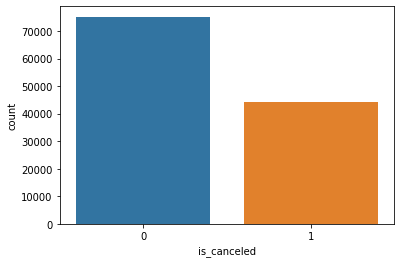

In [11]:
sns.countplot(x='is_canceled',data=df1)

In [12]:
#Finding the percentage of 0 values in the depend feature
percentage=df1['is_canceled'].value_counts()[0]/df1.shape[0]*100
print(f'Ratio of the dependent variable: {int(percentage)}% - {int(100-percentage)}%' )

Ratio of the dependent variable: 62% - 37%


This is clearly not an imbalanced dataset (60%-40%)

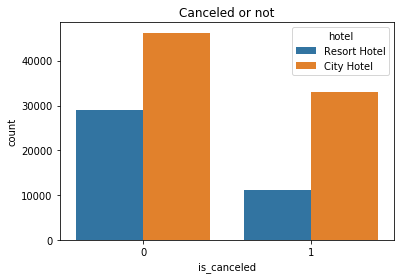

In [13]:
plt.title('Canceled or not')
sns.countplot(x='is_canceled',data=df1,hue='hotel')

## Exploring the categorical features

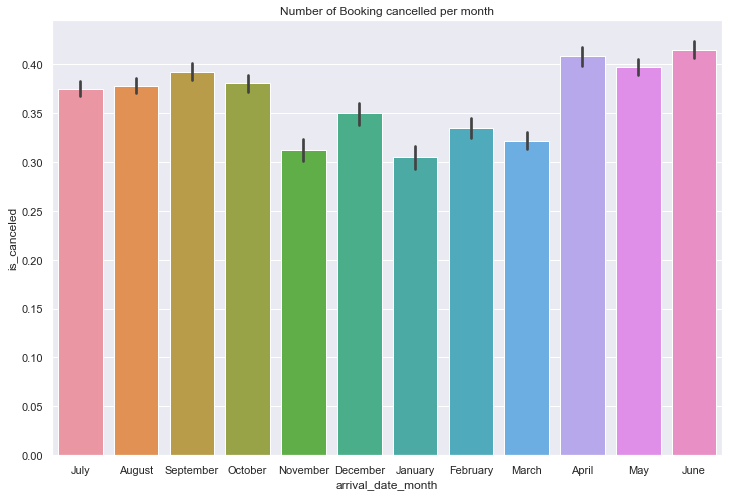

In [17]:
plt.figure(figsize = (12,8))
plt.title('Number of Booking cancelled per month')
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = df1)

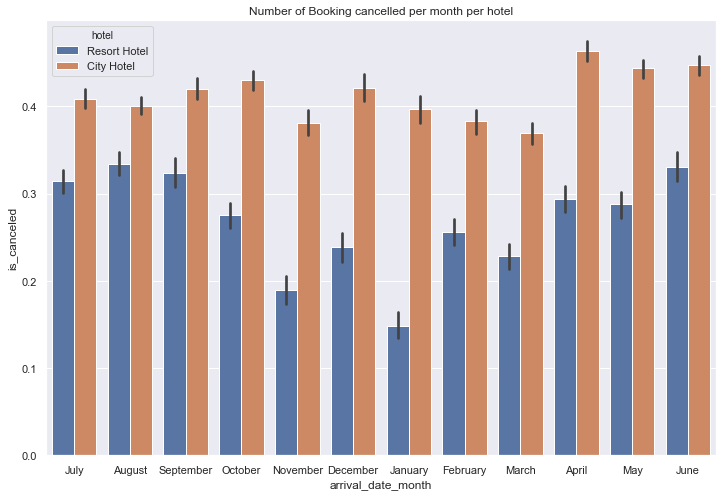

In [18]:
plt.figure(figsize=(12,8))
plt.title('Number of Booking cancelled per month per hotel')
sns.barplot(x='arrival_date_month',y='is_canceled',data=df1,hue='hotel')

Let's try to find out if our assumptions where valid or not.

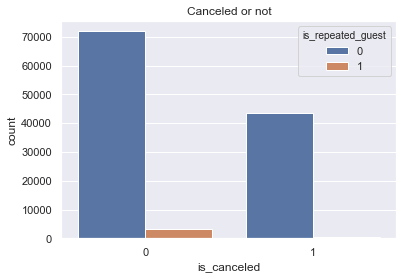

In [19]:
sns.set(style = "darkgrid")
plt.title('Canceled or not')
sns.countplot(x='is_canceled',data=df1,hue='is_repeated_guest')


Correct, it seems that repeated guess are less likely to cancel their reservations.

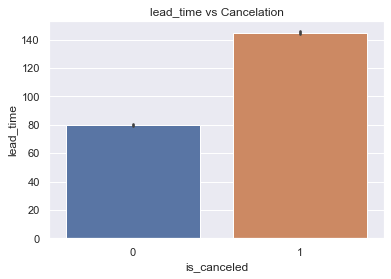

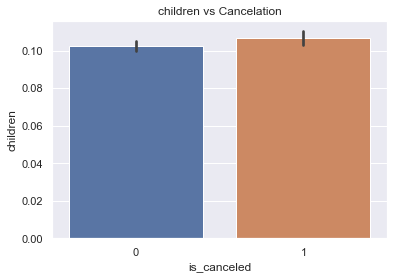

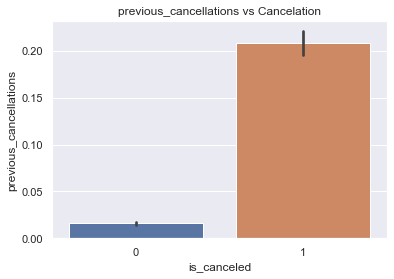

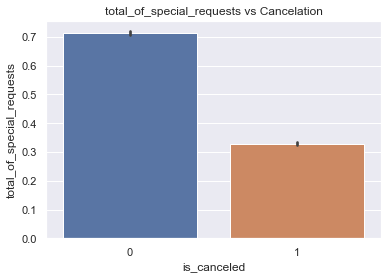

In [20]:
assumptions=['lead_time','children','previous_cancellations','total_of_special_requests']
for assumption in assumptions:
    sns.set(style = "darkgrid")
    plt.title(f'{assumption} vs Cancelation')
    sns.barplot(x='is_canceled',y=assumption,data=df1)
    plt.show()

* I was totally wrong, looking at this barplot, it seems that the higher the lead time, the lower the probability of cancelation.
* It seems that the fact that it is a family that made the reservation has no impact on the probability of cancelation. WRONG assumption.
* The number of booking that were cancelled by the customer increases the probability of cancelation.
* It seems that the more number of total_of_special_requests, the less likely the cancelation.

### Let's explore how bookings price for each hotels evolve during the year

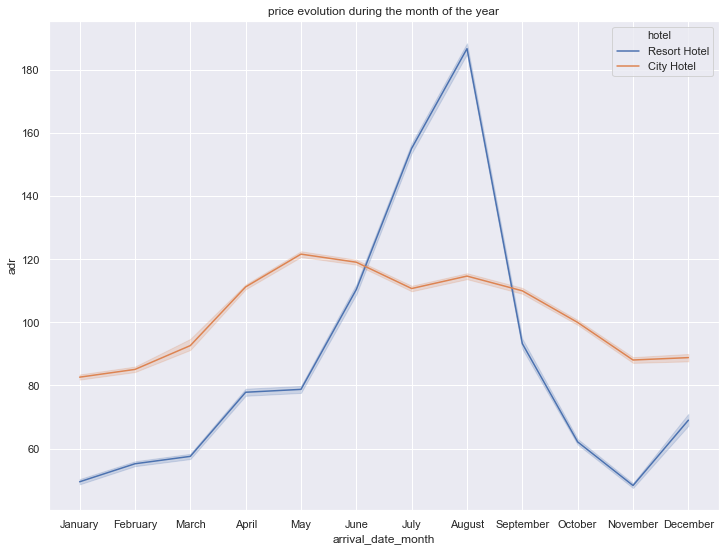

In [21]:
price_month=df1[['arrival_date_month','adr','hotel','adults','children','babies']].copy()
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
price_month["arrival_date_month"] = pd.Categorical(price_month["arrival_date_month"], categories=months, ordered=True)


plt.figure(figsize=(12,9))
plt.title('price evolution during the month of the year')
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=price_month)

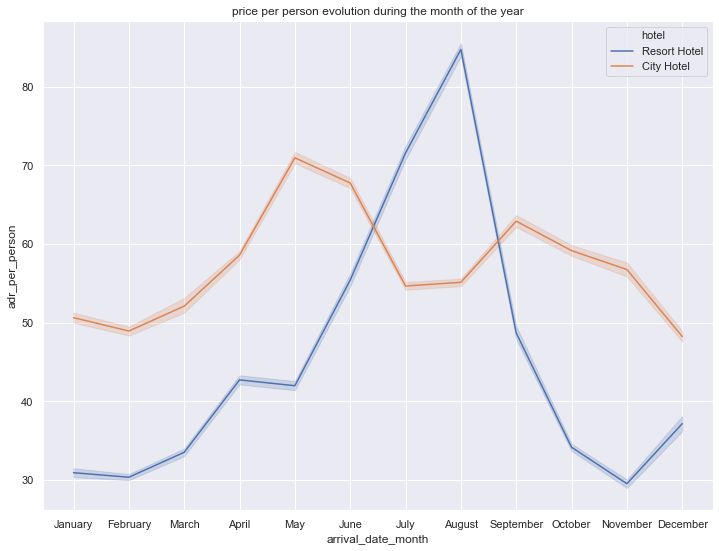

In [22]:
price_month['adr_per_person']=price_month.apply(lambda x:x.adr/(x.children+x.adults+x.babies) 
                                                if (x.children+x.adults+x.babies)!=0 else x.adr,axis=1)
plt.figure(figsize=(12,9))
plt.title('price per person evolution during the month of the year')
sns.lineplot(x = "arrival_date_month", y="adr_per_person", hue="hotel", data=price_month)

### Just for curiosity, let's check out the number of nights people stay at the hotel

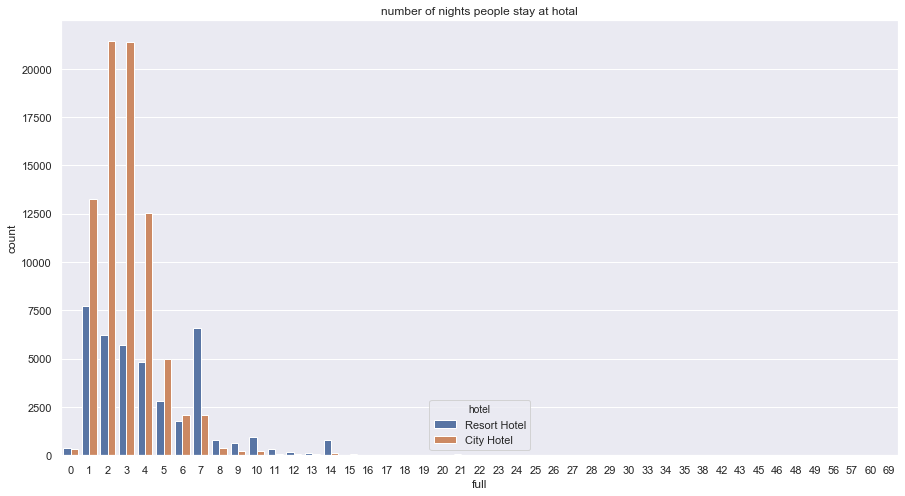

In [23]:
nights=df1[['hotel','stays_in_week_nights','stays_in_weekend_nights']].copy()
nights['full']=nights['stays_in_week_nights']+nights['stays_in_weekend_nights']
plt.figure(figsize=(15,8))
plt.title('number of nights people stay at hotal')
sns.countplot(x='full',data=nights,hue='hotel')

### Correlations

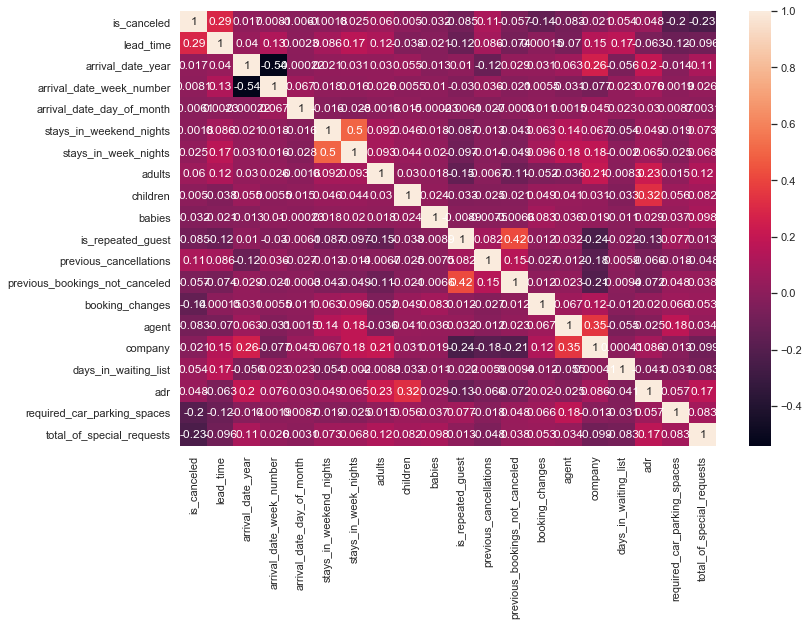

In [24]:
corr=df1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)

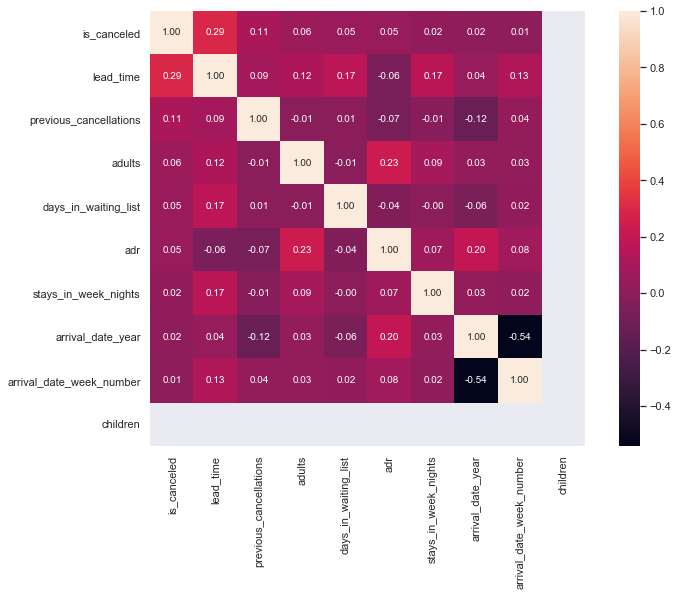

In [25]:
#is_canceled correlation matrix
# code for the heatmap: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'is_canceled')['is_canceled'].index
cm = np.corrcoef(df1[cols].values.T)

plt.figure(figsize=(12,8))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
            yticklabels=cols.values, xticklabels=cols.values)


Lead time is the most correlated numerical feature with the dependent variable. The higher the lead time the higher the probability of cancelation.

### Let us have a look at the feature Deposit Type

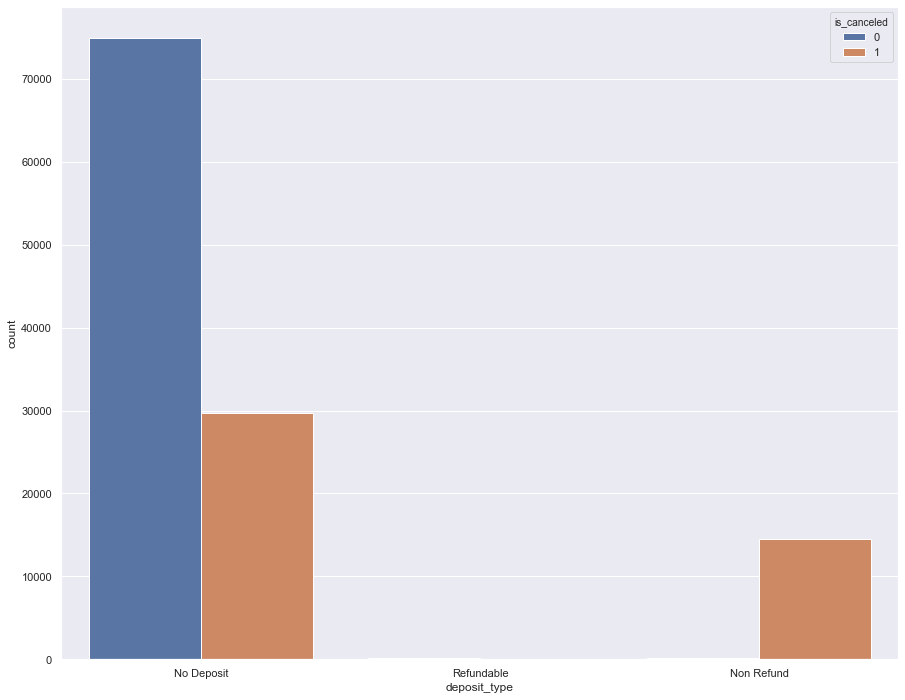

In [26]:
plt.figure(figsize=(15,12))
sns.countplot(x='deposit_type',data=df1,hue='is_canceled')

## Checking if it is or not an imbalanced dataset

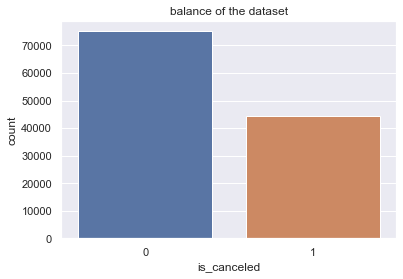

In [27]:
plt.title('balance of the dataset')
sns.countplot(df1.is_canceled)

Ratio of the Binary Dataset: 62% - 37%


60% - 40% Thus it is a balanced dataset. We will not need to do anything about it.

In [29]:
df1.to_csv('hotels_booking_EDA.csv',index=False)